In [1]:
# Necessary package imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Preliminary data cleaning
# Import functions from your module
from insurance_utils import load_and_preprocess, encode_categorical_features, calculate_resolution_time

In [3]:
df = pd.read_csv("https://data.texas.gov/resource/ubdr-4uff.csv?$limit=248000", header=0, encoding='utf8')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247789 entries, 0 to 247788
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   complaint_number          247789 non-null  int64 
 1   respondent_name           247789 non-null  object
 2   complainant_role          247789 non-null  object
 3   reason                    247783 non-null  object
 4   complaint_confirmed_code  247789 non-null  object
 5   disposition               246765 non-null  object
 6   received_date             247789 non-null  object
 7   closed_date               247789 non-null  object
 8   complaint_type            247788 non-null  object
 9   coverage_type             247789 non-null  object
 10  coverage_level            247789 non-null  object
 11  involved_party_type       219626 non-null  object
 12  respondent_id             247789 non-null  int64 
 13  respondent_role           247787 non-null  object
 14  resp

In [5]:
load_and_preprocess(df)

,respondent_name,complainant_role,reason,complaint_confirmed_code,disposition,received_date,closed_date,complaint_type,coverage_type,coverage_level,involved_party_type,respondent_id,respondent_role,respondent_type,complainant_type
0,METROPOLITAN LIFE INSURANCE COMPANY,Relative,Customer Service,No,Other,2012-06-12,2012-07-25,"Life, Accident and Health",Life & Annuity,Individual Life,NaN,13191,Ins Co - Licensed/Active,Organization,INDV
1,AETNA LIFE INSURANCE COMPANY,Provider,Delays (Claims Handling),No,Information Furnished,2012-06-21,2012-08-01,"Life, Accident and Health",Accident and Health,Group A&H,Insured,245,Ins Co - Licensed/Active,Organization,ORG
2,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,2012-06-11,2012-07-30,"Life, Accident and Health",Accident and Health,Group A&H,Insured,10047,Ins Co - Licensed/Active,Organization,ORG
3,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,2012-06-28,2012-07-30,"Life, Accident and Health",Accident and Health,Group A&H,Insured,10047,Ins Co - Licensed/Active,Organization,ORG
4,"CHARTER OAK FIRE INSURANCE COMPANY, THE",Insured,Unsatisfactory Settle/Offer,No,Contract Language/Legal Issue; Question of Fact,2012-06-13,2012-07-17,Property and Casualty,Automobile,Individual Private Pass,Insured,2918,Ins Co - Licensed/Active,Organization,INDV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247784,Sirva,Other,Unsatisfactory Settle/Offer,No,Record Only; Referred To; No Jurisdiction,2024-03-19,2024-03-22,Property and Casualty,Liability,General Liability,Associated Subject Company; Portal - Insured; ...,212726,Other,Organization,INDV
247785,ALLSTATE VEHICLE AND PROPERTY INSURANCE COMPANY,Insured,Delays (Policyholder Service),No,Contract Language/Legal Issue; Information Fur...,2024-01-18,2024-03-20,Property and Casualty,Homeowners,Homeowners,Associated Subject Company; Portal - Insured; ...,833,Ins Co - Licensed/Active,Organization,INDV
247786,"HUTCHERSON, GREGORY DON",Insured,Delays (Policyholder Service),Yes,Information Furnished; Question of Fact,2024-01-18,2024-03-20,Property and Casualty,Homeowners,Homeowners,Associated Subject Company; Portal - Insured; ...,221292,Agent,Individual,INDV
247787,"Blue Cross and Blue Shield of Texas, A Divisio...",Provider,Denial Of Claim,No,Insufficient Information; Record Only,2024-03-22,2024-03-25,"Life, Accident and Health",Accident and Health,Individual A & H,Insured; Portal - Insured; Portal - Other Comp...,10047,Ins Co - Licensed/Active,Organization,ORG


In [6]:
# Overview of the dataset
print(df.head())
print(df.describe(include='all', datetime_is_numeric=True))  # Adjusted to handle datetime
print(df.info())

                                     respondent_name complainant_role  \
0                METROPOLITAN LIFE INSURANCE COMPANY         Relative   
1                       AETNA LIFE INSURANCE COMPANY         Provider   
2  BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...         Provider   
3  BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...         Provider   
4            CHARTER OAK FIRE INSURANCE COMPANY, THE          Insured   

                        reason complaint_confirmed_code  \
0             Customer Service                       No   
1     Delays (Claims Handling)                       No   
2              Denial Of Claim                       No   
3              Denial Of Claim                       No   
4  Unsatisfactory Settle/Offer                       No   

                                       disposition received_date closed_date  \
0                                            Other    2012-06-12  2012-07-25   
1                            Information Furni

In [7]:
calculate_resolution_time(df)

,respondent_name,complainant_role,reason,complaint_confirmed_code,disposition,complaint_type,coverage_type,coverage_level,involved_party_type,respondent_id,respondent_role,respondent_type,complainant_type,resolution_time
0,METROPOLITAN LIFE INSURANCE COMPANY,Relative,Customer Service,No,Other,"Life, Accident and Health",Life & Annuity,Individual Life,NaN,13191,Ins Co - Licensed/Active,Organization,INDV,43
1,AETNA LIFE INSURANCE COMPANY,Provider,Delays (Claims Handling),No,Information Furnished,"Life, Accident and Health",Accident and Health,Group A&H,Insured,245,Ins Co - Licensed/Active,Organization,ORG,41
2,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,"Life, Accident and Health",Accident and Health,Group A&H,Insured,10047,Ins Co - Licensed/Active,Organization,ORG,49
3,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,"Life, Accident and Health",Accident and Health,Group A&H,Insured,10047,Ins Co - Licensed/Active,Organization,ORG,32
4,"CHARTER OAK FIRE INSURANCE COMPANY, THE",Insured,Unsatisfactory Settle/Offer,No,Contract Language/Legal Issue; Question of Fact,Property and Casualty,Automobile,Individual Private Pass,Insured,2918,Ins Co - Licensed/Active,Organization,INDV,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247784,Sirva,Other,Unsatisfactory Settle/Offer,No,Record Only; Referred To; No Jurisdiction,Property and Casualty,Liability,General Liability,Associated Subject Company; Portal - Insured; ...,212726,Other,Organization,INDV,3
247785,ALLSTATE VEHICLE AND PROPERTY INSURANCE COMPANY,Insured,Delays (Policyholder Service),No,Contract Language/Legal Issue; Information Fur...,Property and Casualty,Homeowners,Homeowners,Associated Subject Company; Portal - Insured; ...,833,Ins Co - Licensed/Active,Organization,INDV,62
247786,"HUTCHERSON, GREGORY DON",Insured,Delays (Policyholder Service),Yes,Information Furnished; Question of Fact,Property and Casualty,Homeowners,Homeowners,Associated Subject Company; Portal - Insured; ...,221292,Agent,Individual,INDV,62
247787,"Blue Cross and Blue Shield of Texas, A Divisio...",Provider,Denial Of Claim,No,Insufficient Information; Record Only,"Life, Accident and Health",Accident and Health,Individual A & H,Insured; Portal - Insured; Portal - Other Comp...,10047,Ins Co - Licensed/Active,Organization,ORG,3


In [8]:
# Identifying missing data
print(df.isnull().sum())

# Identify the unique value counts in the dataframe
print(df.nunique())

respondent_name             0
complainant_role            0
reason                      0
complaint_confirmed_code    0
disposition                 0
complaint_type              0
coverage_type               0
coverage_level              0
involved_party_type         1
respondent_id               0
respondent_role             0
respondent_type             0
complainant_type            0
resolution_time             0
dtype: int64
respondent_name             15489
complainant_role               31
reason                       7692
complaint_confirmed_code        2
disposition                  3976
complaint_type                 17
coverage_type                   7
coverage_level                 68
involved_party_type          6830
respondent_id               14444
respondent_role                51
respondent_type                 2
complainant_type                2
resolution_time               785
dtype: int64


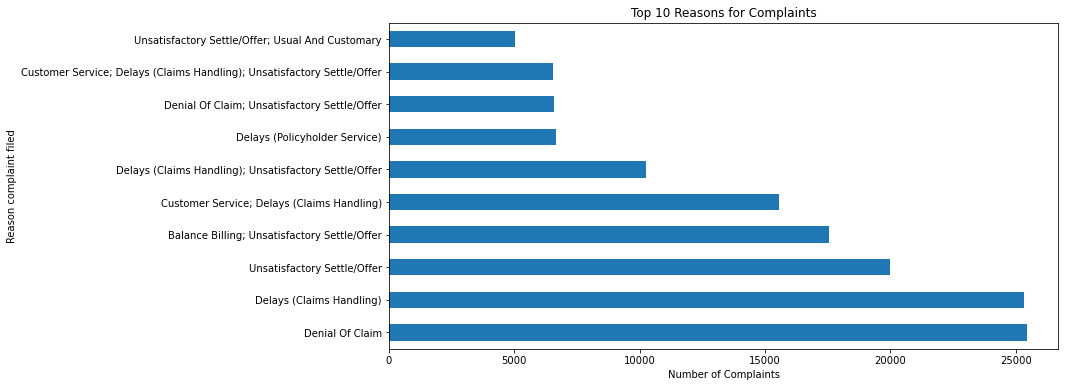

In [9]:
# Common reasons for complaints
plt.figure(figsize=(12, 6))
df['reason'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Reasons for Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Reason complaint filed')
plt.show()

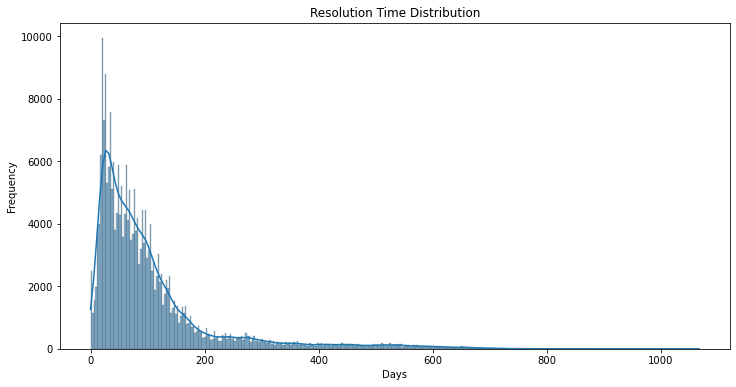

In [10]:
# Resolution Time Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['resolution_time'].dropna(), kde=True)
plt.title('Resolution Time Distribution')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

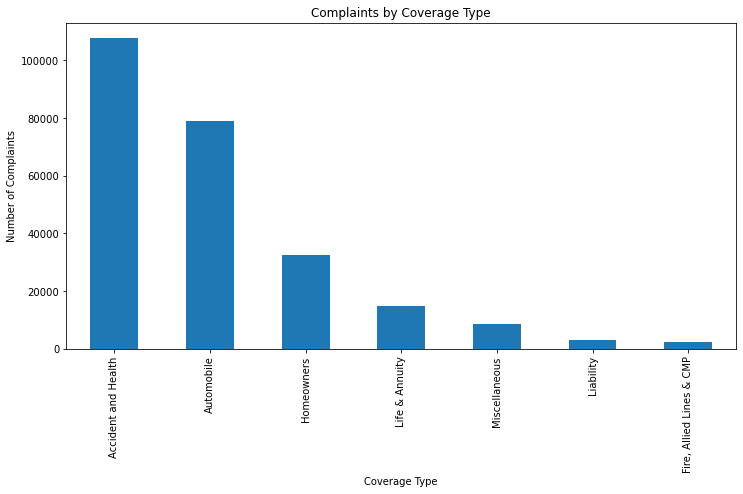

In [11]:
# EDA: Complaints by coverage type
plt.figure(figsize=(12, 6))
coverage_counts = df['coverage_type'].value_counts()
coverage_counts.plot(kind='bar')
plt.title('Complaints by Coverage Type')
plt.xlabel('Coverage Type')
plt.ylabel('Number of Complaints')
plt.show()

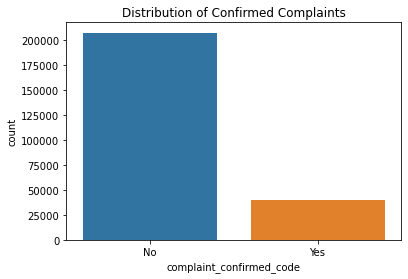

In [12]:
# Plot distribution of target variable
sns.countplot(x='complaint_confirmed_code', data=df)
plt.title('Distribution of Confirmed Complaints')
plt.show()

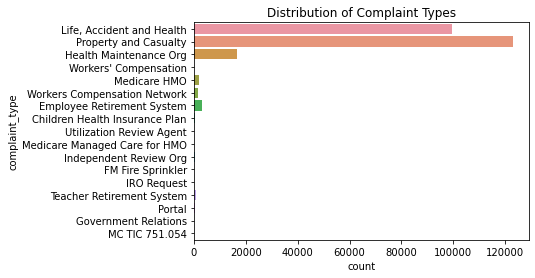

In [13]:
# Plot distribution of Complaint type
sns.countplot(y='complaint_type', data=df)
plt.title('Distribution of Complaint Types')
plt.show()

In [14]:
encode_categorical_features(df)

,respondent_name,complainant_role,reason,complaint_confirmed_code,disposition,complaint_type,coverage_type,coverage_level,involved_party_type,respondent_id,respondent_role,respondent_type,complainant_type,resolution_time
0,9006,25,3939,0,2988,7,5,31,6830,13191,25,1,0,43
1,222,24,4905,0,2077,7,0,20,6100,245,25,1,1,41
2,1795,24,6074,0,2988,7,0,20,6100,10047,25,1,1,49
3,1795,24,6074,0,2988,7,0,20,6100,10047,25,1,1,32
4,2759,17,7668,0,1633,12,1,32,6100,2918,25,1,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247784,13091,21,7668,0,3634,12,4,19,4331,212726,33,1,0,3
247785,453,17,5388,0,1541,12,3,25,4331,833,25,1,0,62
247786,6745,17,5388,1,2393,12,3,25,4331,221292,0,0,0,62
247787,2328,24,6074,0,2529,7,0,29,6391,10047,25,1,1,3


In [15]:
# Splitting dataset
X = df.drop(['complaint_confirmed_code'], axis=1)
y = df['complaint_confirmed_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
 #Feature scaling
scaler = StandardScaler()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Ensure X_train and X_test are independent copies to safely modify
X_train = X_train.copy()
X_test = X_test.copy()

# Apply scaling directly using .loc for explicit in-place modification
X_train.loc[:, numeric_features] = scaler.fit_transform(X_train.loc[:, numeric_features])
X_test.loc[:, numeric_features] = scaler.transform(X_test.loc[:, numeric_features])

In [17]:
# Model training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [18]:
# Train the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [19]:
# Predictions
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

In [20]:
print("Random Forest Model")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Random Forest Model
Accuracy: 0.8802615117639937
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     41386
           1       0.76      0.40      0.53      8172

    accuracy                           0.88     49558
   macro avg       0.82      0.69      0.73     49558
weighted avg       0.87      0.88      0.86     49558



In [21]:
print("Gradient Boosting Model")
print("Accuracy:", accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))

Gradient Boosting Model
Accuracy: 0.8756003067113282
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     41386
           1       0.82      0.31      0.45      8172

    accuracy                           0.88     49558
   macro avg       0.85      0.65      0.69     49558
weighted avg       0.87      0.88      0.85     49558



In [22]:
# Feature Importance Plots
features = list(X.columns)

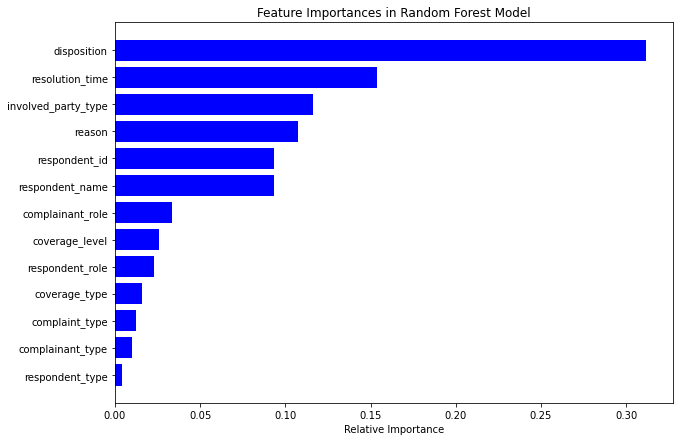

In [23]:
# Random Forest
importances_rf = rf_model.feature_importances_
indices_rf = np.argsort(importances_rf)

plt.figure(figsize=(10, 7))
plt.title('Feature Importances in Random Forest Model')
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], color='b', align='center')
plt.yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()


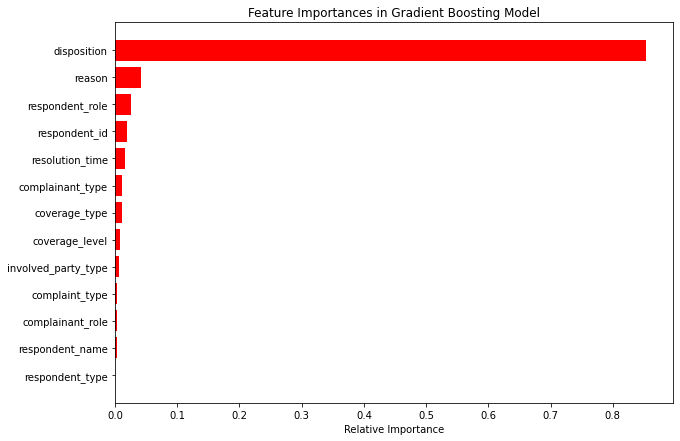

In [24]:
# Gradient Boosting
importances_gb = gb_model.feature_importances_
indices_gb = np.argsort(importances_gb)

plt.figure(figsize=(10, 7))
plt.title('Feature Importances in Gradient Boosting Model')
plt.barh(range(len(indices_gb)), importances_gb[indices_gb], color='r', align='center')
plt.yticks(range(len(indices_gb)), [features[i] for i in indices_gb])
plt.xlabel('Relative Importance')
plt.show()